# Challenge: Backtest on Other Datasets

## Download data from `yfinance`

In [2]:
import yfinance as yf

ticker = 'SOL-USD'
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614
...,...,...,...,...,...,...
2024-06-26,136.554977,140.168762,134.925766,136.609146,136.609146,1670038554
2024-06-27,136.613419,150.767212,135.244995,149.448380,149.448380,2831651846
2024-06-28,149.454269,150.051590,139.305893,139.703400,139.703400,2396070692


## Preprocess the data

### Filter the date range

- Since 1 year ago at least

In [3]:
df = df.loc['2020-01-01':].copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614
...,...,...,...,...,...,...
2024-06-26,136.554977,140.168762,134.925766,136.609146,136.609146,1670038554
2024-06-27,136.613419,150.767212,135.244995,149.448380,149.448380,2831651846
2024-06-28,149.454269,150.051590,139.305893,139.703400,139.703400,2396070692


### Create the target variable

#### Percentage change

- Percentage change on `Adj Close` for tomorrow

In [4]:
df['change_tomorrow'] = df['Adj Close'].pct_change(-1)
df.change_tomorrow

Date
2020-04-10    0.224293
2020-04-11   -0.119759
2020-04-12    0.134573
2020-04-13    0.175106
2020-04-14    0.023620
                ...   
2024-06-26   -0.085911
2024-06-27    0.069755
2024-06-28   -0.002191
2024-06-29   -0.034133
2024-06-30         NaN
Name: change_tomorrow, Length: 1543, dtype: float64

If you look at the change from the first day to the next one, the price decreases. Therefore, the first value of the previous output should be negative.

In [5]:
df['Adj Close']

Date
2020-04-10      0.951054
2020-04-11      0.776819
2020-04-12      0.882507
2020-04-13      0.777832
2020-04-14      0.661925
                 ...    
2024-06-26    136.609146
2024-06-27    149.448380
2024-06-28    139.703400
2024-06-29    140.010147
2024-06-30    144.958069
Name: Adj Close, Length: 1543, dtype: float64

We shall multiply by -1:

In [6]:
df.change_tomorrow = df.change_tomorrow * -1
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276,-0.224293
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444,0.119759
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897,-0.134573
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285,-0.175106
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614,-0.023620
...,...,...,...,...,...,...,...
2024-06-26,136.554977,140.168762,134.925766,136.609146,136.609146,1670038554,0.085911
2024-06-27,136.613419,150.767212,135.244995,149.448380,149.448380,2831651846,-0.069755
2024-06-28,149.454269,150.051590,139.305893,139.703400,139.703400,2396070692,0.002191


To better read the data, we shall multiply by 100 to have percentage values:

In [7]:
df.change_tomorrow = df.change_tomorrow * 100
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276,-22.429290
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444,11.975886
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897,-13.457284
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285,-17.510587
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614,-2.362014
...,...,...,...,...,...,...,...
2024-06-26,136.554977,140.168762,134.925766,136.609146,136.609146,1670038554,8.591082
2024-06-27,136.613419,150.767212,135.244995,149.448380,149.448380,2831651846,-6.975478
2024-06-28,149.454269,150.051590,139.305893,139.703400,139.703400,2396070692,0.219089


#### Drop rows with any missing data

In [8]:
df = df.dropna().copy()
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276,-22.429290
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444,11.975886
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897,-13.457284
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285,-17.510587
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614,-2.362014
...,...,...,...,...,...,...,...
2024-06-25,132.269348,139.729584,131.296356,136.559204,136.559204,2517391150,0.036558
2024-06-26,136.554977,140.168762,134.925766,136.609146,136.609146,1670038554,8.591082
2024-06-27,136.613419,150.767212,135.244995,149.448380,149.448380,2831651846,-6.975478


#### BONUS: how to interpret the distribution of a continuous variable

Based on the following normal distribution:

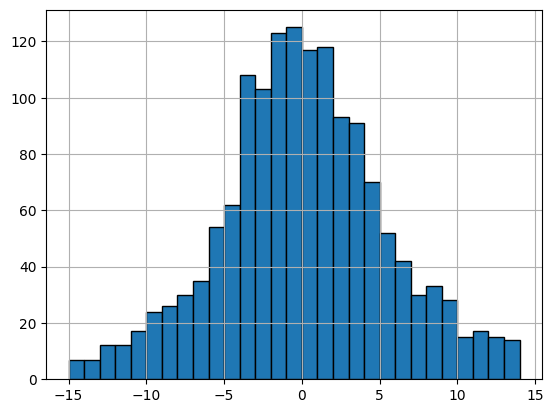

In [9]:
df.change_tomorrow.hist(bins=range(-15,15), edgecolor='black');

And the standard deviation:

In [10]:
df.change_tomorrow.std()

7.122087426677518

We can say that 68% of the changes are between -3.5 and 3.5, approximately.

#### Change sign

Did the stock go up or down?

In [11]:
import numpy as np

In [12]:
df.change_tomorrow = np.where(df.change_tomorrow > 0, 1, -1)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276,-1
2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444,1
2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897,-1
2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285,-1
2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614,-1
...,...,...,...,...,...,...,...
2024-06-25,132.269348,139.729584,131.296356,136.559204,136.559204,2517391150,1
2024-06-26,136.554977,140.168762,134.925766,136.609146,136.609146,1670038554,1
2024-06-27,136.613419,150.767212,135.244995,149.448380,149.448380,2831651846,-1


## Compute Machine Learning model

Proposal: Random Forest within `ensemble` module of `sklearn` library

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(max_depth=7, random_state=42)

In [15]:
y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

In [16]:
model.fit(X, y)

RandomForestClassifier(max_depth=7, random_state=42)

In [17]:
model.score(X, y)

0.7542153047989624

## Backtesting

### Create the strategy

In [18]:
from backtesting import Strategy

In [19]:
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Run the Backtest

In [20]:
from backtesting import Backtest

In [21]:
bt = Backtest(
    X, SimpleClassificationUD, cash=10000,
    commission=.002, exclusive_orders=True
)

In [22]:
results = bt.run()

### Show the report in a DataFrame

In [ ]:
results.to_frame('Value').loc[:'Return [%]']

,Value
Start,2020-01-02 00:00:00
End,2023-05-15 00:00:00
Duration,1229 days 00:00:00
Exposure Time [%],99.764151
Equity Final [$],28916881.488771
Equity Peak [$],28977622.433596
Return [%],289068.814888


## Plot the backtest report

> Don't worry about this new tool just yet, we will explain in a future chapter how to interpret the following chart.

In [ ]:
bt.plot(filename='backtest_report.html')

Row(id='1407', ...)

## How to invest based on the numerical increase?

> Instead of the direction (UP or DOWN)

Next chapter → [Backtesting with Regression Models]()

Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

Classification Strategy | Regression Strategy
-|-
![](src/res_classification.png) | ![](src/res_regression.png)